In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
color= sns. color_palette()

In [3]:
df = pd.read_excel(r'C:\Users\admin\Downloads\Online Retail.xlsx')


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# #Equal Width

Create or Load Your Data:
Make sure you have a DataFrame with the data you want to bin.

Calculate Equal-Width Bins:
Use pd.cut to create equal-width bins.

Create a Pivot Table:
Use a pivot table to count the occurrences of each bin.

Visualize the Data:
Use matplotlib or seaborn to visualize the binned data.

In [5]:
# Load the dataset with the specified encoding
df2 = df.copy()
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Calculate total price
df2['TotalPrice'] = df2['UnitPrice'] * df2['Quantity']

# Calculate RFM Metrics

In [7]:
df2['Date'] = pd.to_datetime(df2['InvoiceDate'])

#Maximum date of entire  dataset
reference_date = df['InvoiceDate'].max()

def calculate_recency(dates): #dates = pd.Series(['2023-01-01', '2023-01-05', '2023-01-09'], dtype='datetime64[ns]')
    return (reference_date - dates.max()).days  #Days between the last transaction of dataset date 
                                                       #and last transaction of date of each customer.

# Calculate RFM metrics
rfm = df2.groupby('CustomerID').agg({ #Groups the DataFrame by the CustomerID column.
                                      #Applies aggregation functions to each group. Specifically
    'Date': calculate_recency,
    'InvoiceNo': 'count', # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Remove rows where any column has a value of 0
rfm = rfm[(rfm['Recency'] != 0) & (rfm['Frequency'] != 0) & (rfm['Monetary'] != 0)]

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,95,1545.41


In [8]:
# Equal-width binning using cut
num_bins = 5
rfm['R_bin'] = pd.cut(rfm['Recency'],bins=num_bins, labels=False) + 1
rfm['F_bin'] = pd.cut(rfm['Frequency'], bins=num_bins, labels=False) + 1
rfm['M_bin'] = pd.cut(rfm['Monetary'], bins=num_bins, labels=False) + 1
rfm.head()

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1,182,4310.00,1,1,1
12348.0,74,31,1797.24,1,1,1
12349.0,18,73,1757.55,1,1,1
12350.0,309,17,334.40,5,1,1
12352.0,35,95,1545.41,1,1,1


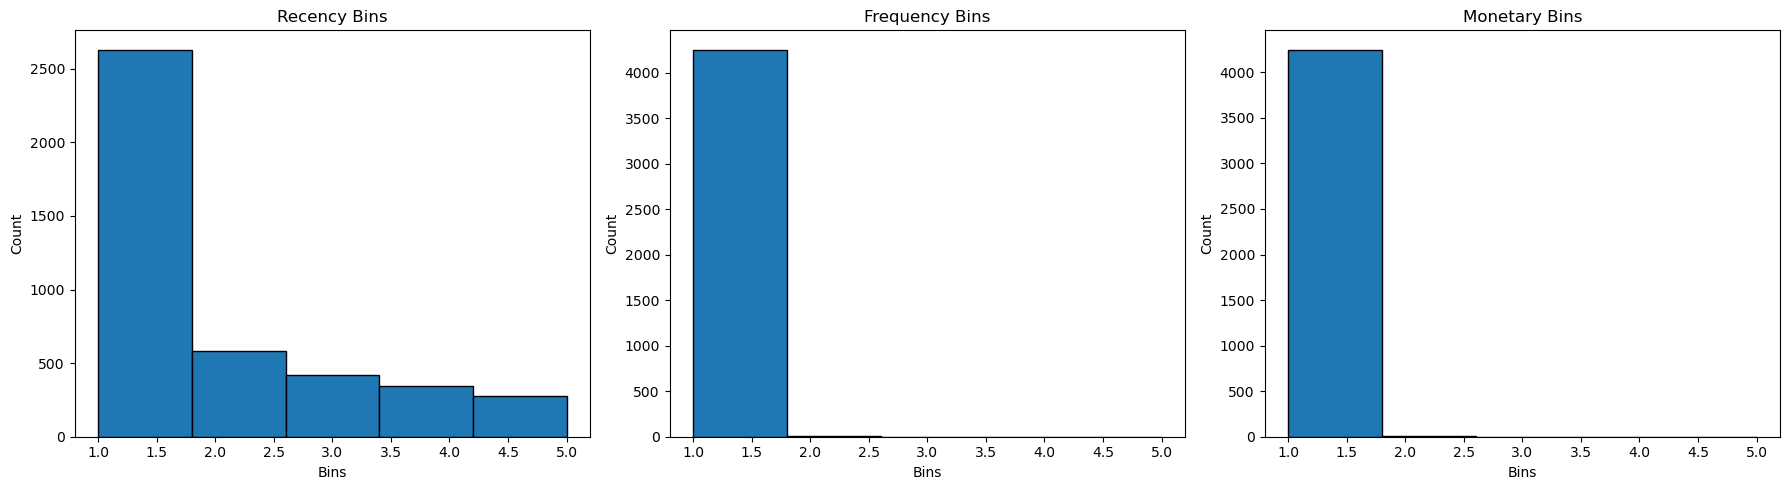

In [9]:
# Plotting histograms for R, F, and M bins
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

num_bins = 5
# Recency histogram
axes[0].hist(rfm['R_bin'], bins=num_bins, edgecolor='black')
axes[0].set_title('Recency Bins')
axes[0].set_xlabel('Bins')
axes[0].set_ylabel('Count')

# Frequency histogram
axes[1].hist(rfm['F_bin'], bins=num_bins, edgecolor='black')
axes[1].set_title('Frequency Bins')
axes[1].set_xlabel('Bins')
axes[1].set_ylabel('Count')

# Monetary histogram
axes[2].hist(rfm['M_bin'], bins=num_bins, edgecolor='black')
axes[2].set_title('Monetary Bins')
axes[2].set_xlabel('Bins')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Equal Frequency  

Read the CSV file: Load the data from the CSV file into a data structure that you can work with, such as a DataFrame if you're using Python and libraries like Pandas.

RFM Analysis: Calculate the recency, Frequency, monetary of each customer

RFM Matrices: Create RFM matrices based on the calculated recency, frequency, and monetary values.

Equal Frequency Segmentation: Divide the customers into segments based on quantiles of their RFM values.


In [10]:
# Load the dataset with the specified encoding
df3 = df.copy()
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# Calculate total price
df3['TotalPrice'] = df3['UnitPrice'] * df3['Quantity']


# Calculate RFM Metrics

In [12]:
df2['Date'] = pd.to_datetime(df2['InvoiceDate'])

#Maximum date of entire  dataset
reference_date = df['InvoiceDate'].max()

def calculate_recency(dates): #dates = pd.Series(['2023-01-01', '2023-01-05', '2023-01-09'], dtype='datetime64[ns]')
    return (reference_date - dates.max()).days  #Days between the last transaction of dataset date 
                                                       #and last transaction of date of each customer.

# Calculate RFM metrics
rfm = df2.groupby('CustomerID').agg({ #Groups the DataFrame by the CustomerID column.
                                      #Applies aggregation functions to each group. Specifically
    'Date': calculate_recency,
    'InvoiceNo': 'count', # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Remove rows where any column has a value of 0
rfm = rfm[(rfm['Recency'] != 0) & (rfm['Frequency'] != 0) & (rfm['Monetary'] != 0)]

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,95,1545.41


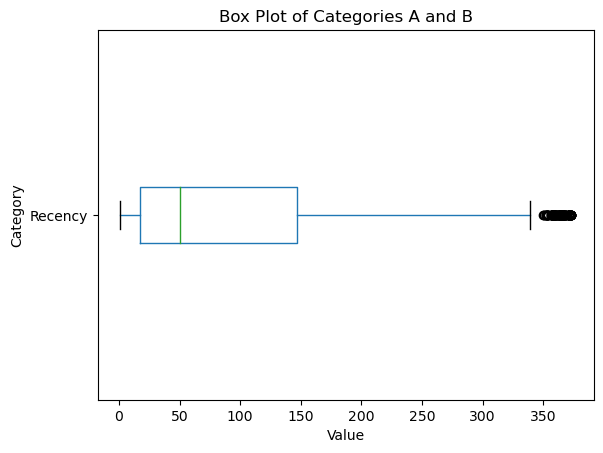

In [13]:
rfm.boxplot(column=['Recency'], grid=False, vert=False)
plt.title('Box Plot of Categories A and B')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()


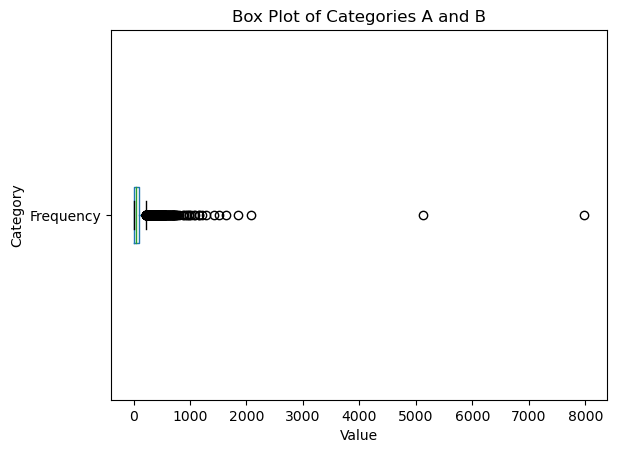

In [14]:
rfm.boxplot(column=['Frequency'], grid=False, vert=False)
plt.title('Box Plot of Categories A and B')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()


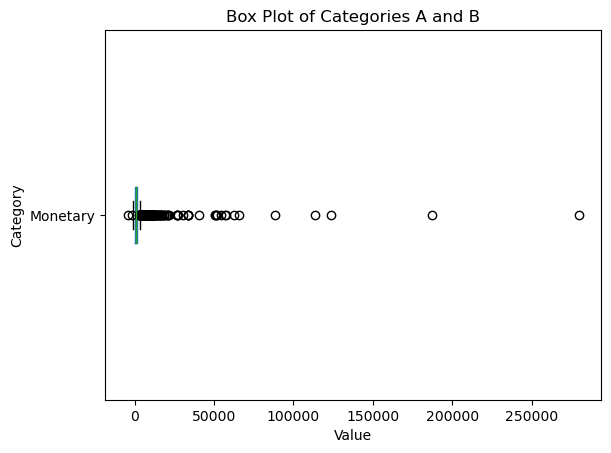

In [15]:
rfm.boxplot(column=['Monetary'], grid=False, vert=False)
plt.title('Box Plot of Categories A and B')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()


# Removing Outliers

In [16]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from 'Recency'
df_cleaned = remove_outliers(rfm,['Recency', 'Frequency','Monetary'])

df_cleaned.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1.0,182.0,NaN
12348.0,74.0,31.0,1797.24
12349.0,18.0,73.0,1757.55
12350.0,309.0,17.0,334.40
12352.0,35.0,95.0,1545.41


In [37]:
# Fill NaN values with the mean of each column
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

df_cleaned.isna().sum()
df_cleaned.head()

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1.0,182.0,823.442253,1,5,5
12348.0,74.0,31.0,1797.240000,4,3,4
12349.0,18.0,73.0,1757.550000,2,4,4
12350.0,309.0,17.0,334.400000,5,2,2
12352.0,35.0,95.0,1545.410000,3,4,4


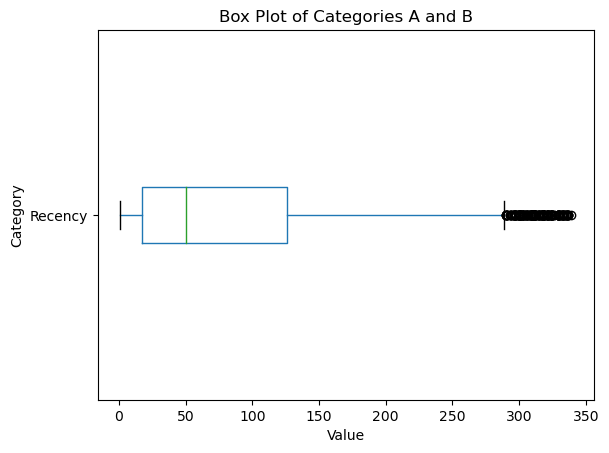

In [38]:
df_cleaned.boxplot(column=['Recency'], grid=False, vert=False)
plt.title('Box Plot of Categories A and B')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()

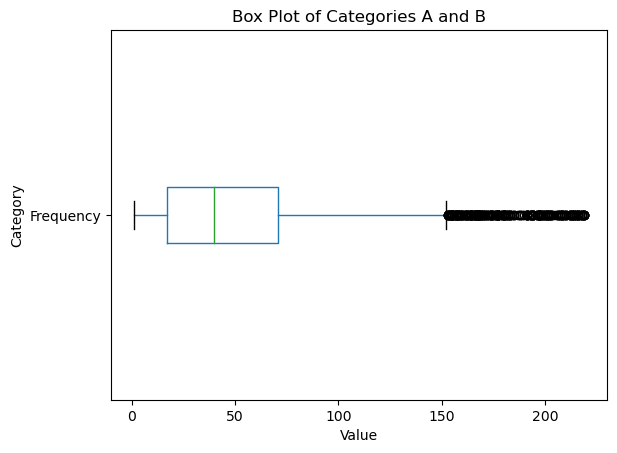

In [39]:
df_cleaned.boxplot(column=['Frequency'], grid=False, vert=False)
plt.title('Box Plot of Categories A and B')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()

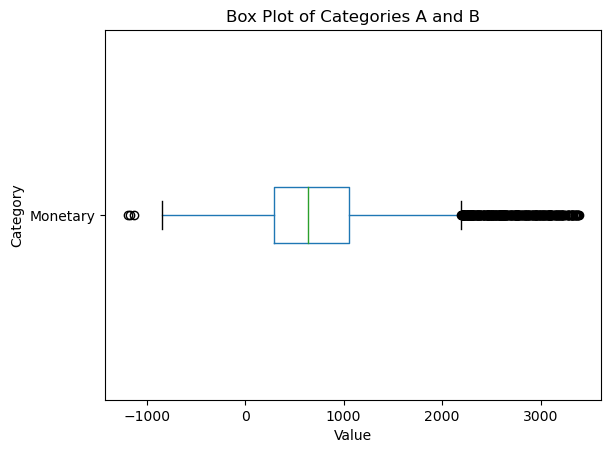

In [40]:
df_cleaned.boxplot(column=['Monetary'], grid=False, vert=False)
plt.title('Box Plot of Categories A and B')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()

#  Equal Frequency Binning

In [41]:
# Equal frequency binning using qcut
df_cleaned['R_bin'] = pd.qcut(rfm['Recency'], q=5, labels=False) + 1
df_cleaned['F_bin'] = pd.qcut(rfm['Frequency'], q=5, labels=False) + 1
df_cleaned['M_bin'] = pd.qcut(rfm['Monetary'], q=5, labels=False) + 1

df_cleaned.head()

#Below diagram determines value stored in 1st bin, 2nd bin, 3rd bin, 4th bin

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1.0,182.0,823.442253,1,5,5
12348.0,74.0,31.0,1797.240000,4,3,4
12349.0,18.0,73.0,1757.550000,2,4,4
12350.0,309.0,17.0,334.400000,5,2,2
12352.0,35.0,95.0,1545.410000,3,4,4


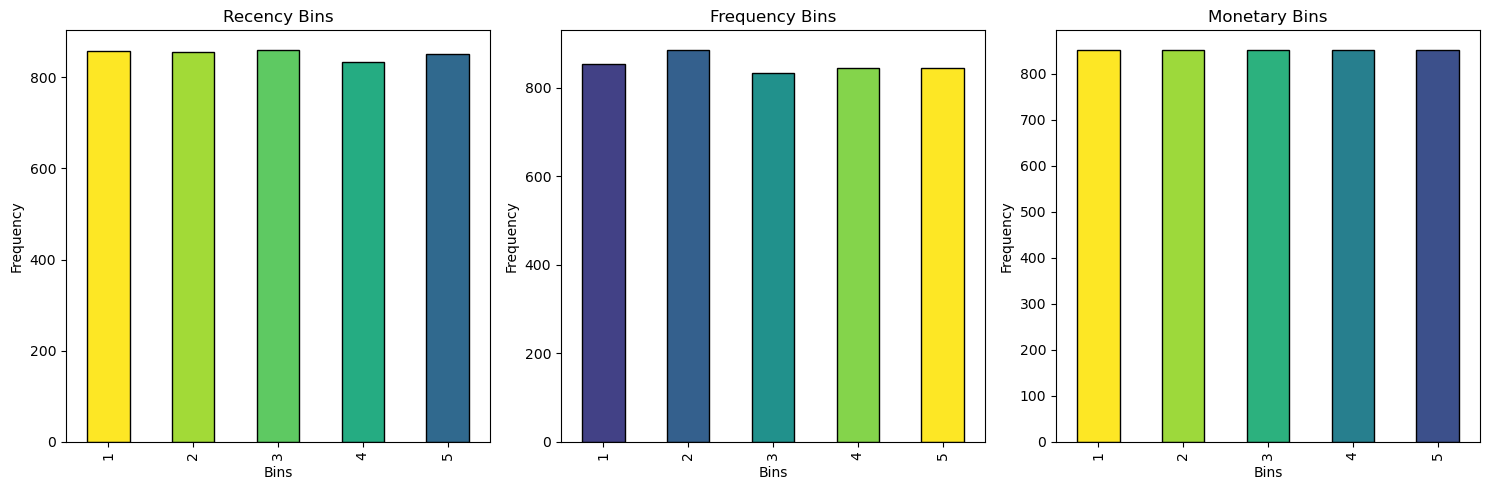

In [42]:
# Calculate average monetary value for each Rbin and Fbin
avg_monetary_per_R_bin = df_cleaned.groupby('R_bin')['Monetary'].mean()
avg_monetary_per_F_bin = df_cleaned.groupby('F_bin')['Monetary'].mean()

# Calculate average recency for Monetary bins
avg_recency__per_M_bin = df_cleaned.groupby('M_bin')['Recency'].mean()

#for recency bins and frequency bins the color of bars should be avg monetory value and for monetory bin average recency
#Expectation high value cx are best cx

# Plotting the bar graphs
plt.figure(figsize=(15, 5))

# Bar plot for Recency bins
plt.subplot(1, 3, 1)
df_cleaned['R_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black',color=plt.cm.viridis(avg_monetary_per_R_bin / avg_monetary_per_R_bin.max()))
plt.title('Recency Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Bar plot for Frequency bins
plt.subplot(1, 3, 2)
df_cleaned['F_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color=plt.cm.viridis(avg_monetary_per_F_bin / avg_monetary_per_F_bin.max()))
plt.title('Frequency Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Bar plot for Monetary bins
plt.subplot(1, 3, 3)
df_cleaned['M_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black',color=plt.cm.viridis(avg_recency__per_M_bin / avg_recency__per_M_bin.max()))
plt.title('Monetary Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Assosiation Test (Chi Square Test)

An association test is a statistical method used to determine whether there is a significant relationship between two or more variables.

Null Hypothesis (H0): Assumes no association between the variables. P-Value (> 0.05)

Alternative Hypothesis (H1): Assumes there is an association between the variables. P-Value (≤ 0.05)

In [47]:
rfm['R_bin'] = pd.qcut(rfm['Recency'], q=3, labels=['Low', 'Medium', 'High'])
rfm['F_bin'] = pd.qcut(rfm['Frequency'], q=3, labels=['Low', 'Medium', 'High'])
rfm['M_bin'] = pd.qcut(rfm['Monetary'], q=3, labels=['Low', 'Medium', 'High'])


rfm.head()

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1,182,4310.00,Low,High,High
12348.0,74,31,1797.24,Medium,Medium,High
12349.0,18,73,1757.55,Low,High,High
12350.0,309,17,334.40,High,Low,Low
12352.0,35,95,1545.41,Medium,High,High


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Recoding the data to compare any two bins from R_bin with the Monetary values

crosstab_Monetory = pd.crosstab(rfm['R_bin'].map({'Low': 'Low', 'High': 'High'}), rfm['M_bin'], values=rfm['Monetary'], aggfunc='mean')

# Recoding the data to compare any two bins from R_bin with the Frequency values

crosstab_Frequency = pd.crosstab(rfm['R_bin'].map({'Low': 'Low', 'High': 'High'}), rfm['F_bin'], values=rfm['Frequency'], aggfunc='mean')

chi2_Monetory, p_Monetary, _, _ = chi2_contingency(crosstab_Monetory)
chi2_Frequency, p_Frequency, _, _ = chi2_contingency(crosstab_Frequency)



print("\nChi-squared test with Monetory :")
print(f"Chi2: {chi2_Monetory}, p-value: {p_Monetary}")

print("\nChi-squared test Frequency :")
print(f"Chi2: {chi2_Frequency}, p-value: {p_Frequency}")

alpha = 0.05

# Check significance for monetary values

if p_Monetary < alpha:
    print("\nReject Null Hypothesis There is a significant difference between the bins for monetary Values.")
else:
    print("\nFail To Reject Null Hypothesis There is no significant difference between the bins for monetary Values.")
    
    # Check significance for frequency values
    
if p_Frequency < alpha:
    print("\nReject Null Hypothesis There is a significant difference between the bins for Frequency Values.")
else:
    print("\nFail To Reject Null Hypothesis There is no significant difference between the bins for Frequency Values.")


Chi-squared test with Monetory :
Chi2: 188.01184970265035, p-value: 1.4919201199349252e-41

Chi-squared test Frequency :
Chi2: 6.28771834856534, p-value: 0.04311608393745185

Reject Null Hypothesis There is a significant difference between the bins for monetary Values.

Reject Null Hypothesis There is a significant difference between the bins for Frequency Values.


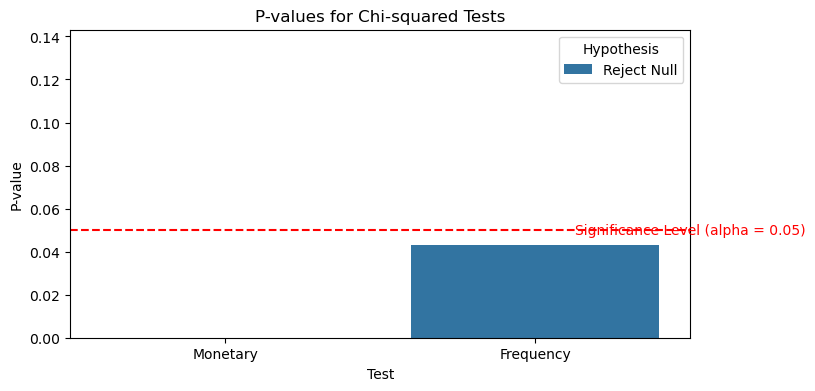

In [49]:
# Significance level
alpha = 0.05

# Visualization of p-values and significance
data = {
    'Test': ['Monetary', 'Frequency'],
    'p-value': [p_Monetary, p_Frequency],
    'Threshold': [alpha, alpha],
    'Hypothesis': ['Reject Null' if p_Monetary < alpha else 'Fail to Reject Null',
                   'Reject Null' if p_Frequency < alpha else 'Fail to Reject Null']
}

df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 4))
sns.barplot(x='Test', y='p-value', hue='Hypothesis', data=df_plot, dodge=False)
plt.axhline(y=alpha, color='red', linestyle='--')
plt.text(1.5, alpha, 'Significance Level (alpha = 0.05)', color='red', va='center', ha='center')
plt.ylim(0, max(df_plot['p-value']) + 0.1)
plt.title('P-values for Chi-squared Tests')
plt.ylabel('P-value')
plt.xlabel('Test')
plt.legend(title='Hypothesis')
plt.show()

# Explanation

If a p-value is below this line, it indicates a statistically significant association between the compared bins.

These p-values are extraordinarily small (close to zero), indicating highly significant associations between the RFM bins. When plotted on a linear scale, these p-values are effectively zero, hence no visible bars.

# ANOVA Test (Analysis of Varience)

In [50]:
rfm['R_bin'] = pd.qcut(rfm['Recency'], q=3, labels=['Low', 'Medium', 'High'])
rfm['F_bin'] = pd.qcut(rfm['Frequency'], q=3, labels=['Low', 'Medium', 'High'])
rfm['M_bin'] = pd.qcut(rfm['Monetary'], q=3, labels=['Low', 'Medium', 'High'])


rfm.head()

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1,182,4310.00,Low,High,High
12348.0,74,31,1797.24,Medium,Medium,High
12349.0,18,73,1757.55,Low,High,High
12350.0,309,17,334.40,High,Low,Low
12352.0,35,95,1545.41,Medium,High,High


In [51]:
import scipy.stats as stats

# ANOVA test for R_Bin
R_statistic, p_Recency = stats.f_oneway(
    rfm[rfm['R_bin'] == 'Low']['Recency'], #rows where 'R_bin' is 'Low', and then selects the 'Recency' column from these rows.
    rfm[rfm['R_bin'] == 'Medium']['Recency'],
    rfm[rfm['R_bin'] == 'High']['Recency']
)

# ANOVA test for F_Bin
F_statistic, p_Frequency = stats.f_oneway(
    rfm[rfm['F_bin'] == 'Low']['Frequency'],
    rfm[rfm['F_bin'] == 'Medium']['Frequency'],
    rfm[rfm['F_bin'] == 'High']['Frequency']
)

# ANOVA test for M_Bin
M_statistic, p_Monetary = stats.f_oneway(
    rfm[rfm['M_bin'] == 'Low']['Monetary'],
    rfm[rfm['M_bin'] == 'Medium']['Monetary'],
    rfm[rfm['M_bin'] == 'High']['Monetary']
)

# Print results
print(f'ANOVA test for R_bin, R_statistic : {R_statistic} p_Recency : {p_Recency}')
print(f'\nANOVA test for F_bin, F_statistic : {F_statistic} p_Frequency : {p_Frequency}')
print(f'\nANOVA test for M_bin, M_statistic : {M_statistic} p_Monetary : {p_Monetary}')


if p_Recency <= 0.05:
    print("\nReject the null hypothesis: There is a significant difference between the means of the groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference between the means of the groups.")
          
if p_Frequency <= 0.05:
    print("\nReject the null hypothesis: There is a significant difference between the means of the groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference between the means of the groups.")
          
if p_Monetary <= 0.05:
    print("\nReject the null hypothesis: There is a significant difference between the means of the groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference between the means of the groups.")
                  
        
          


ANOVA test for R_bin, R_statistic : 7209.987865410394 p_Recency : 0.0

ANOVA test for F_bin, F_statistic : 500.0396821339687 p_Frequency : 8.848962252191386e-196

ANOVA test for M_bin, M_statistic : 158.64881936496417 p_Monetary : 3.524845441040697e-67

Reject the null hypothesis: There is a significant difference between the means of the groups.

Reject the null hypothesis: There is a significant difference between the means of the groups.

Reject the null hypothesis: There is a significant difference between the means of the groups.


In this example, rfm[rfm['rbin'] == 'Bin1']['Recency'] filters the DataFrame rfm to only
include rows where the value in the 'rbin' column is 'Bin1', 
and then selects the 'Recency' values for those filtered rows.

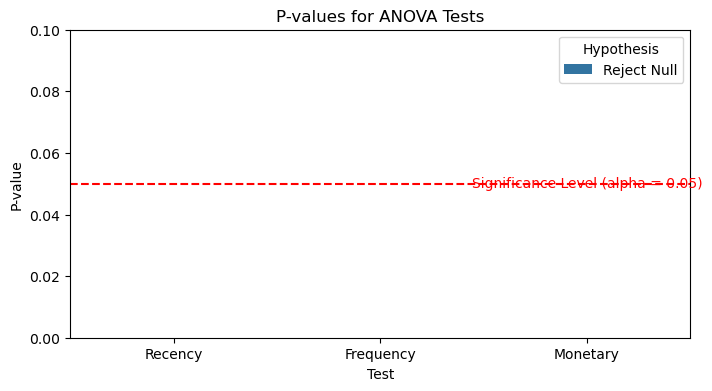

In [52]:
# Visualization of p-values and significance
data = {
    'Test': ['Recency', 'Frequency', 'Monetary'],
    'p-value': [p_Recency, p_Frequency, p_Monetary],
    'Threshold': [0.05, 0.05, 0.05],
    'Hypothesis': ['Reject Null' if p_Recency <= 0.05 else 'Fail to Reject Null',
                   'Reject Null' if p_Frequency <= 0.05 else 'Fail to Reject Null',
                   'Reject Null' if p_Monetary <= 0.05 else 'Fail to Reject Null']
}

df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 4))
sns.barplot(x='Test', y='p-value', hue='Hypothesis', data=df_plot, dodge=False)
plt.axhline(y=0.05, color='red', linestyle='--')
plt.text(2, 0.05, 'Significance Level (alpha = 0.05)', color='red', va='center', ha='center')
plt.ylim(0, max(df_plot['p-value']) + 0.1)
plt.title('P-values for ANOVA Tests')
plt.ylabel('P-value')
plt.xlabel('Test')
plt.legend(title='Hypothesis')
plt.show()